In [1]:
%history -g -f "history.py"

In [281]:
sys.path.append('C:/Users/nyasha/Desktop/Masters-Nyasha/Models')

import sys

import torch
import numpy as np
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from CNN import ConvNet1
from training_functions import *

In [283]:
batch_size = 128
num_epochs = 25

In [58]:
# Extracting the training, validation and testing data
compressed_file_path = "C:/Users/nyasha/Desktop/Masters-Nyasha/Processed Data/processed_data.npz"
x_train, x_test, x_val, y_train, y_test, y_val = get_train_test_data(compressed_file_path)

In [273]:
# Check if files have been imported correctly
print(x_train.shape)  
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(12554, 128, 45)
(2696, 128, 45)
(2689, 128, 45)
(12554,)
(2696,)
(2689,)


In [47]:
np.unique(y_val)

array(['2_walking', 'clutter/noise', 'running', 'sphere_swing', 'vehicle',
       'walking'], dtype='<U13')

In [284]:
# Creating the data loaders
train_loader, val_loader, test_loader = createDataloaders(x_train, y_train, x_val, y_val, x_test, y_test, batch_size)

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 30 * 9, 128)

        self.dropout2 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 64)

        self.dropout3 = nn.Dropout(0.25)
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))

        x = self.pool2(F.relu(self.conv2(x)))

        x = x.view(-1, 64 * 30 * 9)
        #x = self.dropout1(x)

        x = F.relu(self.fc1(x))

        #x = self.dropout2(x)
        x = F.relu(self.fc2(x))

        #x = self.dropout3(x)
        x = self.fc3(x)
        
        return x


In [34]:
# Global Averaging model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(32, 32, 3)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.dropout1 = nn.Dropout(0.25)
        #self.fc1 = nn.Linear(32 * 30 * 9, 128)
        self.fc1 = nn.Linear(32 * 1 * 1, 6)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))

        self.dropout2 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 64)

        self.dropout3 = nn.Dropout(0.25)
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))

        x = self.pool2(F.relu(self.conv2(x)))

        x = self.avgpool(x)

        x = x.view(-1, 32 * 1 * 1)

        x = self.fc1(x)

        #x = x.view(-1, 32 * 30 * 9)
        #x = self.dropout1(x)

        #x = F.relu(self.fc1(x))

        #x = self.dropout2(x)
        #x = F.relu(self.fc2(x))

        #x = self.dropout3(x)
        #x = self.fc3(x)
        
        return x

In [54]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 32, 3, padding=1)

        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(32 * 32 * 11, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))

        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(-1, 32 * 32 * 11)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [469]:
# Residual network 
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # First block
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32, momentum=0.9)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Second block
        self.conv2 = nn.Conv2d(32, 32, 1)
        self.bn2 = nn.BatchNorm2d(32, momentum=0.9)

        # Third Block
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(32, momentum=0.9)

        # Fourth Block
        self.conv4 = nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(32, momentum=0.9)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(0.5)
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        # Fully connected layer
        self.fc1 = nn.Linear(32 * 1 * 1, 6)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):

        #x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool1(F.relu(self.conv1(x)))
        residual = x

        x = F.relu(self.bn2(self.conv2(x)))
        #x = F.relu(self.conv2(x))

        x = F.relu(self.bn3(self.conv3(x)))
        #x = F.relu(self.conv3(x))

        x += residual # Adding residual connection

        x = F.relu(self.bn4(self.conv4(x)))
        #x = F.relu(self.conv4(x))

        x = self.avgpool(x)

        x = x.view(-1, 32 * 1 * 1)

        #x = self.dropout(x)
        x = self.fc1(x)

        #x = self.dropout(x)
        #x = F.relu(self.fc2(x))

        #x = self.dropout(x)
        #x = self.fc3(x)
        return x

In [2]:
# Batch Norm Model
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Block 1
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)

        # Block 2
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.bn2 = nn.BatchNorm2d(64)

        self.dropout = nn.Dropout(0.5)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))

        # Dense layer 1
        self.fc1 = nn.Linear(64 * 1 * 1, 6)
        #self.bn3 = nn.BatchNorm1d(128)

        # Dense layer 2
        # self.fc2 = nn.Linear(128, 64)
        # self.bn4 = nn.BatchNorm1d(64)
        # self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        print(x.shape)
        # Global average pool
        x = self.avgpool(x)

        x = x.view(-1, 64 * 1 * 1)

        x = self.avgpool(x)

        x = self.fc1(x)


        # x = self.dropout(x)
        # x = F.relu(self.bn3(self.fc1(x)))
        # # x = self.dropout(x)
        # x = F.relu(self.bn4(self.fc2(x)))
        # # x = self.dropout(x)
        # x = self.fc3(x)
        return x



In [38]:
import torch.nn as nn
import torch.nn.functional as F

class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2, 1)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.conv3 = nn.Conv2d(32, 32, 3)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(32 * 16 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 32 * 16 * 5)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


In [24]:
class ConvNet1(nn.Module):
    def __init__(self):
        super(ConvNet1, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(10, 20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(20,20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Sequential(
            nn.Linear(20 * 1 *8, 128),
            nn.ReLU())
        self.fc2 = nn.Linear(128, 4)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [285]:
# Batch Norm Model !!!!!!!!!! Correcto
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Block 1
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)

        # Block 2
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.bn2 = nn.BatchNorm2d(32)

        # Block 3
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.bn3 = nn.BatchNorm2d(64)

        self.dropout = nn.Dropout(0.5)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))

        # Dense layer 1
        self.fc1 = nn.Linear(64 * 1 * 1, 6)
        #self.bn3 = nn.BatchNorm1d(128)

        # Dense layer 2
        # self.fc2 = nn.Linear(128, 64)
        # self.bn4 = nn.BatchNorm1d(64)
        # self.fc3 = nn.Linear(64, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        #print(x.shape)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        #print(x.shape)
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        
        #print(x.shape)
        # Global average pool
        x = self.avgpool(x)
        
        x = x.view(-1, 64 * 1 * 1)

        #x = self.avgpool(x)

        x = self.fc1(x)


        # x = self.dropout(x)
        # x = F.relu(self.bn3(self.fc1(x)))
        # # x = self.dropout(x)
        # x = F.relu(self.bn4(self.fc2(x)))
        # # x = self.dropout(x)
        # x = self.fc3(x)
        return x


In [264]:
# Select a model from ../Models
model_1  = Net()
device = get_device()
model_on_device = model_1.to(device) # Move model to the current device

Running on the GPU


In [10]:
data = iter(train_loader)
images, _ = next(data)

In [111]:
model_1(images)

NameError: name 'images' is not defined

In [18]:
images = images.to(device, dtype=torch.float)
x = model_1(images)

In [10]:
# Get number of parameters in the model
sum(params.numel() for params in model_1.parameters())

23910

In [12]:
images = images.to(device, dtype=torch.float)

x = model_1.pool1(F.relu(model_1.conv1(images)))

residual = x

x = F.relu(model_1.conv2(x))
x = F.relu(model_1.conv3(x))

x += residual # Adding residual connection

x = (F.relu(model_1.conv4(x)))

"""
images = images.to(device, dtype=torch.float)
x = model_1.pool1(F.relu(model_1.conv1(images)))
print(x.shape)
x = model_1.pool2(F.relu(model_1.conv2(x)))
x = model_1.avgpool(x)
print(x.shape)
x = F.relu(model_1.conv3(x))
x = model_1.pool(F.relu(model_1.conv4(x)))
"""
x.shape

torch.Size([128, 32, 32, 11])

In [494]:
# Select a model from ../Models
model_1  = Net()
device = get_device()
model_on_device = model_1.to(device) # Move model to the current device


import torch
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from DatasetCreator import HAVSDataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from pytorchtools import EarlyStopping
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import confusion_matrix

def train_model(num_epochs, train_loader, val_loader, criterion, optimizer, device, model_on_device):
    start = time.time()
    optimizer_name, optimizer_params_dict = get_info(optimizer)
    writer = SummaryWriter(comment=f"_model_{model_on_device._get_name()}_criterion_{criterion._get_name()}_optimizer_{optimizer_name}")
    
    num_batches = len(train_loader)

    # Introducing the learning rate schedule
     
    scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [5, 20, 50], gamma=0.1, last_epoch=-1, verbose=True)
    #MultiStepLR(optimizer, [4, 10, 15, 20, 25, 30, 35, 40, 45, 50], gamma=0.1, last_epoch=-1, verbose=False)
    # [5, 15, 20, 25, 30, 35, 40, 45, 50]
    #StepLR(optimizer, step_size=10, gamma=0.2, last_epoch=-1, verbose=False)
    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=20, verbose=True)

    for epoch in range(1, num_epochs+1):
        model_on_device.train() # Turn on Dropout, BatchNorm etc
        train_loss_per_batch = np.empty(num_batches)
        accuracy_per_batch = np.empty(num_batches)
        train_loss = 0
        correct = 0
        total = 0
        accuracy = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images = images.to(device, dtype=torch.float)
            labels = labels.to(device)
            output = model_on_device(images)
            _, predicted = torch.max(output.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            optimizer.zero_grad()
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()/images.shape[0]
            accuracy = 100 * correct / total

            train_loss_per_batch[batch_idx] =  train_loss
            accuracy_per_batch[batch_idx] = accuracy

        avg_epoch_train_loss = np.mean(train_loss_per_batch)
        avg_epoch_accuracy = np.mean(accuracy_per_batch)

        
        test_loss, test_accuracy , _, _, _ = evaluate_model(val_loader, device, model_on_device, criterion)

        scheduler.step()

        writer.add_scalar('Loss/Train', avg_epoch_train_loss, epoch)
        writer.add_scalar('Accuracy/Train', avg_epoch_accuracy, epoch)
        writer.add_scalar('Loss/Validation', test_loss, epoch)
        writer.add_scalar('Accuracy/Validation', test_accuracy, epoch)
        
        print('Epoch: {}/{} \t Training Loss: {:.4f}, Accuracy: {:.2f}, Testing Loss: {:.4f}, Accuracy: {:.2f}'.format(epoch, num_epochs, train_loss, accuracy, test_loss, test_accuracy))

        
        early_stopping(test_loss, model_on_device)
        if early_stopping.early_stop:
            print("Early stopping")
            break    
       
    ## Please revisit this error in names -> test/val
    stop = time.time()
    duration_s = stop - start
    writer.add_text('optimzer_parameters', str(optimizer_params_dict))
    writer.add_text('model', str(model_on_device))
    writer.add_text('Duration_s', str(duration_s))

    dummy_data =  torch.randn(256, 1, 128 ,45)
    dummy_data = dummy_data.to(device, dtype=torch.float)
    writer.add_graph(model=model_on_device, input_to_model=dummy_data)

    writer.close()


Running on the GPU


In [495]:
class_weights = get_class_weights(y_train, device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model_on_device.parameters(), lr=0.005) # , lr=0.01,momentum=0.9 ,momentum=0.9 , lr=0.004

In [483]:
class_weights

tensor([0.9987, 1.0202, 1.2704, 1.4591, 0.6728, 0.9438], device='cuda:0')

In [22]:
model_on_device

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=64, out_features=6, bias=True)
)

In [496]:
train_model(100, train_loader, val_loader, criterion, optimizer, device, model_on_device)

Adjusting learning rate of group 0 to 5.0000e-03.
Adjusting learning rate of group 0 to 5.0000e-03.
Epoch: 1/100 	 Training Loss: 0.9402, Accuracy: 62.65, Testing Loss: 3.3703, Accuracy: 30.31
Validation loss decreased (inf --> 3.370286).  Saving model ...
Adjusting learning rate of group 0 to 5.0000e-03.
Epoch: 2/100 	 Training Loss: 0.5038, Accuracy: 81.77, Testing Loss: 10.4099, Accuracy: 12.16
EarlyStopping counter: 1 out of 20
Adjusting learning rate of group 0 to 5.0000e-03.
Epoch: 3/100 	 Training Loss: 0.3485, Accuracy: 86.77, Testing Loss: 6.7189, Accuracy: 30.87
EarlyStopping counter: 2 out of 20
Adjusting learning rate of group 0 to 5.0000e-03.
Epoch: 4/100 	 Training Loss: 0.2828, Accuracy: 88.42, Testing Loss: 19.5776, Accuracy: 11.49
EarlyStopping counter: 3 out of 20
Adjusting learning rate of group 0 to 5.0000e-04.
Epoch: 5/100 	 Training Loss: 0.2452, Accuracy: 89.52, Testing Loss: 3.3277, Accuracy: 38.01
Validation loss decreased (3.370286 --> 3.327722).  Saving model

In [497]:
model_1.load_state_dict(torch.load("checkpoint.pt"))
model_on_device = model_1.to(device)

In [498]:
test_loss, test_accuracy , _, _, _ = evaluate_model(test_loader, device, model_on_device, criterion)
test_accuracy

79.67359050445104

In [21]:
torch.save(model_on_device, "model_cnn.pth")

In [14]:
dummy_input = torch.randn(128, 1, 128, 44, device='cuda')
torch.onnx.export(model_on_device, dummy_input, "model_cnn.onnx")

In [13]:
model_on_device = torch.load("model_cnn.pth")

In [459]:
transform = transforms.Compose(
    [
    transforms.ToTensor()
    ])
# Create the datasets
train_dataset = HAVSDataset(x_train, y_train, transform=transform)
val_dataset = HAVSDataset(x_val, y_val, transform=transform)
test_dataset = HAVSDataset(x_test, y_test, transform=transform)

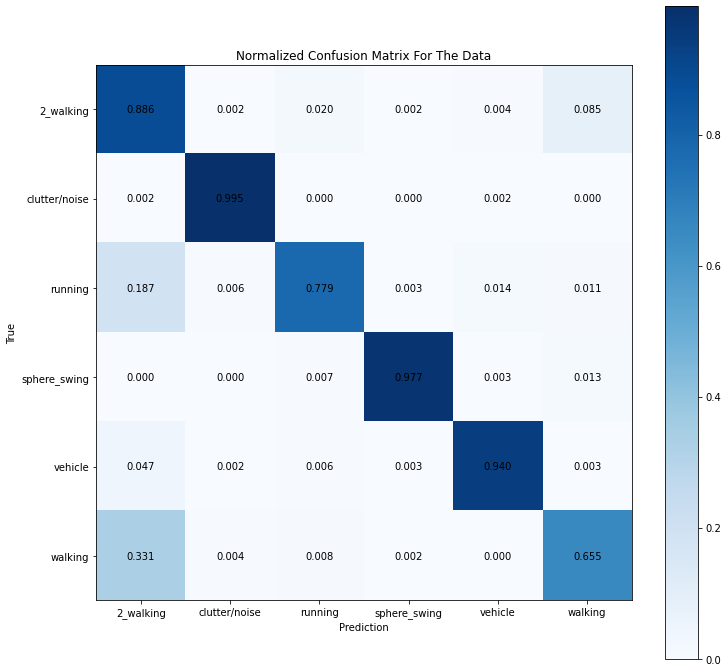

87.28151729267385

In [461]:
# Evaluate model performance on test data
#from training_functions import *
_, accuracy,errors,  y_pred_errors, y_true_errors = evaluate_model(val_loader, device, model_on_device, criterion, train_dataset, 'The')
accuracy

In [56]:
np.where(errors==True)

(array([   2,    3,   19,  261,  293,  313,  382,  406,  420,  422,  423,
         424,  429,  430,  431,  432,  433,  434,  435,  436,  437,  438,
         440,  441,  442,  443,  444,  445,  446,  447,  448,  449,  450,
         451,  452,  453,  454,  455,  456,  458,  459,  460,  461,  462,
         463,  465,  466,  467,  473,  474,  475,  476,  477,  478,  479,
         481,  482,  483,  484,  485,  486,  487,  488,  489,  490,  491,
         492,  493,  494,  495,  496,  497,  499,  501,  503,  504,  505,
         507,  508,  509,  510,  512,  513,  517,  518,  519,  521,  522,
         523,  524,  525,  526,  528,  529,  530,  531,  532,  533,  534,
         535,  536,  537,  538,  539,  540,  541,  543,  544,  545,  546,
         547,  548,  550,  551,  552,  555,  556,  557,  558,  560,  562,
         563,  564,  565,  566,  567,  568,  569,  570,  571,  572,  573,
         574,  576,  577,  578,  579,  580,  581,  582,  584,  585,  588,
         589,  590,  591,  592,  593, 

In [18]:
x_test_errors = x_test[errors]
display_errors(x_test_errors, y_pred_errors, y_true_errors, test_dataset)

NameError: name 'display_errors' is not defined

In [53]:
np.where(errors==True)

(array([  573,  1395,  3186,  3599,  4011,  4131,  4338,  5027,  5469,
         5549,  6199,  6370,  6462,  7149,  8455,  9923, 10004, 10387,
        10814, 10860], dtype=int64),)

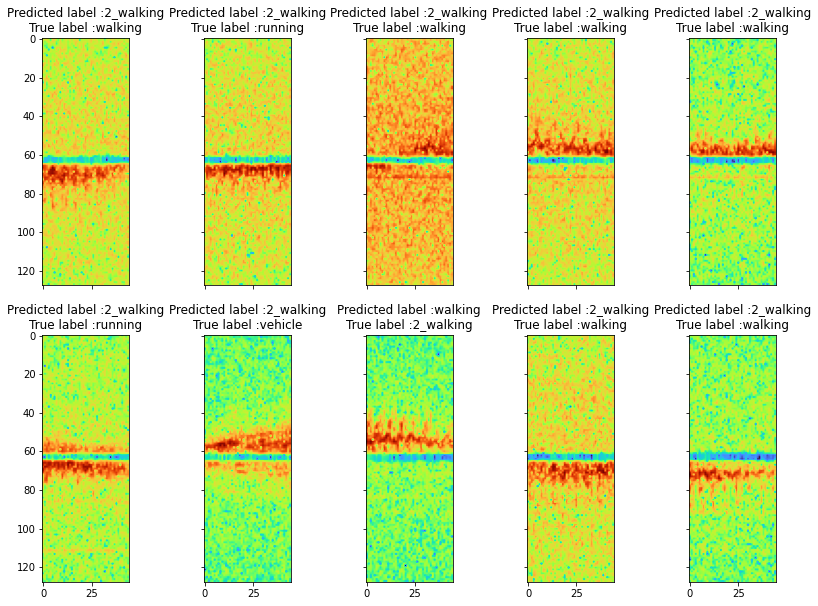

In [468]:
x_test_errors = x_val[errors]
display_errors(x_test_errors, y_pred_errors, y_true_errors, test_dataset)

In [49]:
test_dataset

In [463]:
import random
randomlist = random.sample(range(10, 30), 5)
def display_errors(img_errors, pred_errors, obs_errors, dataset):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 5
    errors_index = random.sample(range(0, len(img_errors)), nrows*ncols)
    classes = dataset.enc.classes_.tolist()
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(14,10))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((128,45)), cmap='turbo')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format( classes[int(pred_errors[error])], classes[int(obs_errors[error])]  ))
            n += 1

In [45]:
classes = va_dataset.enc.classes_.tolist()
classes

['2_walking', 'clutter/noise', 'running', 'sphere_swing', 'vehicle', 'walking']

In [59]:
# Adapted from https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6


In [26]:
def evaluate_model(loader, device, model_on_device, criterion, *args):

    """Evaluate Performance on test set"""
    model_on_device.eval() # Turn off gradient computations
    num_batches = len(loader)
    correct = 0
    total = 0
    running_loss = 0
    y_tot=torch.empty(0)
    y_pred_tot=torch.empty(0)
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images = images.to(device).float()
            labels = labels.to(device)
            outputs = model_on_device(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            running_loss += loss.item()


            labels=labels.cpu()
            predicted=predicted.cpu()

            y_tot = torch.cat((y_tot, labels), 0)
            y_pred_tot = torch.cat((y_pred_tot, predicted), 0)

    accuracy = 100 * correct / total       
    errors = (y_pred_tot - y_tot  != 0)
    y_pred_errors = y_pred_tot[errors]
    y_true_errors = y_tot[errors]

    # Plotting the Confusion Matrix
    assert len(args)==2 or len(args)==0, 'Please insert both dataset and dataset name'
    if args:
        cm = confusion_matrix(y_tot.numpy(), y_pred_tot.numpy())
        np.set_printoptions(precision=4)

        # Coloured confusion matrix
        plt.figure(figsize = (12,12))
        cm = confusion_matrix(y_tot.numpy(), y_pred_tot.numpy(), normalize="true")
        plt.imshow(cm, cmap=plt.cm.Blues)

        for (i, j), z in np.ndenumerate(cm):
            plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
        
        plt.xticks(range(6))
        plt.yticks(range(6))
        plt.xlabel("Prediction")
        plt.ylabel("True")

        # We can retrieve the categories used by the LabelEncoder
        classes = args[0].enc.classes_.tolist()
        plt.gca().set_xticklabels(classes)
        plt.gca().set_yticklabels(classes)

        plt.title("Normalized Confusion Matrix For "+ args[1] + " Data")
        plt.colorbar()
        plt.show()
    return running_loss / num_batches, accuracy, errors, y_pred_errors, y_true_errors 

In [15]:
model_on_device.eval()
Y_pred = model_on_device.predict(x_val)

ModuleAttributeError: 'Net' object has no attribute 'predict'

In [15]:

Confusion_Matrix(model_on_device, train_loader, train_dataset, 'train')

NameError: name 'Confusion_Matrix' is not defined

In [28]:
# Save the model
torch.save(model_on_device, "model.pth")

## Training using the cross validation approach

### Adapted from https://www.machinecurve.com/index.php/2021/02/03/how-to-use-k-fold-cross-validation-with-pytorch/

In [70]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, ConcatDataset
from torchvision import transforms
from sklearn.model_selection import StratifiedKFold
from pytorchtools import EarlyStopping
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()

In [71]:
# Extracting the training, validation and testing data
compressed_file_path = "C:/Users/nyasha/Desktop/Masters-Nyasha/Processed Data/processed_data_cv.npz"
processed_data = np.load(compressed_file_path) # Unzipping
x_train_cv = processed_data["x_train"]
y_train_cv = processed_data["y_train"]

x_test_cv = processed_data["x_test"]
y_test_cv = processed_data["y_test"]

In [72]:
# Configuration options
device = get_device() 
k_folds = 10
num_epochs = 50


class_weights = get_class_weights(y_train_cv, device)
loss_function = nn.CrossEntropyLoss(weight=class_weights)


# For fold results
results = {}

# Set fixed random number seed
torch.manual_seed(42)

# Prepare MNIST dataset by concatenating Train/Test part; we split later.
""""
dataset_train_part = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor(), train=True)
dataset_test_part = MNIST(os.getcwd(), download=True, transform=transforms.ToTensor(), train=False)
dataset = ConcatDataset([dataset_train_part, dataset_test_part])
"""
transform = transforms.Compose(
[
transforms.ToTensor()
])
# Create the datasets
dataset_train_part = HAVSDataset(x_train_cv, y_train_cv, transform=transform)
dataset_test_part = HAVSDataset(x_test_cv, y_test_cv, transform=transform)
dataset = dataset_train_part

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=k_folds, shuffle=False)

# Start print
print('--------------------------------')

# K-fold Cross Validation model evaluation
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset, y_train_cv)):

    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')

    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)

    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                        dataset, 
                        batch_size=10, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                        dataset,
                        batch_size=10, sampler=test_subsampler)

    # Init the neural network
    network = Net()
    network_on_device = network.to(device) # Move model to the current device
    network_on_device.apply(reset_weights)


    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=20, verbose=True)
    
    # Initialize optimizer
    optimizer = torch.optim.Adam(network_on_device.parameters(), lr=1e-4)

    # Run the training loop for defined number of epochs
    for epoch in range(0, num_epochs):

        # Print epoch
        print(f'Starting epoch {epoch+1}')

        # Set current loss value
        current_loss = 0.0

        # Iterate over the DataLoader for training data
        for i, data in enumerate(trainloader, 0):
        
            # Get inputs
            inputs, targets = data
            inputs = inputs.to(device, dtype=torch.float)
            targets = targets.to(device)
  
            # Zero the gradients
            optimizer.zero_grad()
            
            # Perform forward pass
            outputs = network_on_device(inputs)
            
            # Compute loss
            loss = loss_function(outputs, targets)
            
            # Perform backward pass
            loss.backward()
            
            # Perform optimization
            optimizer.step()
            
            # Print statistics
            current_loss += loss.item()
            if i % 500 == 499:
                print('Loss after mini-batch %5d: %.3f' %
                        (i + 1, current_loss / 500))
                current_loss = 0.0

        # Check early stopping
        test_loss, _, _, _, _ = evaluate_model(testloader, device, network_on_device, loss_function)
        early_stopping(test_loss, network_on_device)
        if early_stopping.early_stop:
            print("Early stopping")
            break           
    # Process is complete.
    print('Training process has finished. Saving trained model.')

    # Print about testing
    print('Starting testing')

    # Saving the model
    save_path = f'./model-fold-{fold}.pth'
    torch.save(network.state_dict(), save_path)

    # Evaluation for this fold
    correct, total = 0, 0
    with torch.no_grad():

        # Iterate over the test data and generate predictions
        for i, data in enumerate(testloader, 0):

            # Get inputs
            inputs, targets = data
            inputs = inputs.to(device, dtype=torch.float)
            targets = targets.to(device)
            # Generate outputs
            outputs = network_on_device(inputs)

            # Set total and correct
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        # Print accuracy
        print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
        print('--------------------------------')
        results[fold] = 100.0 * (correct / total)

    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')

r mini-batch   500: 0.002
Loss after mini-batch  1000: 0.002
EarlyStopping counter: 9 out of 20
Starting epoch 15
Loss after mini-batch   500: 0.013
Loss after mini-batch  1000: 0.010
EarlyStopping counter: 10 out of 20
Starting epoch 16
Loss after mini-batch   500: 0.006
Loss after mini-batch  1000: 0.001
EarlyStopping counter: 11 out of 20
Starting epoch 17
Loss after mini-batch   500: 0.001
Loss after mini-batch  1000: 0.000
EarlyStopping counter: 12 out of 20
Starting epoch 18
Loss after mini-batch   500: 0.003
Loss after mini-batch  1000: 0.018
EarlyStopping counter: 13 out of 20
Starting epoch 19
Loss after mini-batch   500: 0.016
Loss after mini-batch  1000: 0.015
EarlyStopping counter: 14 out of 20
Starting epoch 20
Loss after mini-batch   500: 0.000
Loss after mini-batch  1000: 0.000
EarlyStopping counter: 15 out of 20
Starting epoch 21
Loss after mini-batch   500: 0.000
Loss after mini-batch  1000: 0.000
EarlyStopping counter: 16 out of 20
Starting epoch 22
Loss after mini-ba

In [84]:
test_loader = DataLoader(dataset=dataset_test_part, batch_size=batch_size, shuffle=False)

In [85]:
model = Net()
model.load_state_dict(torch.load('model-fold-3.pth'))
model_0_on_device = model.to(device)

In [81]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=dataset_train_part, batch_size=batch_size, shuffle=True)

In [82]:
model = Net()
model_0_on_device = model.to(device)
# Training the model on the whole dataset
train_model(50, train_loader, test_loader, criterion, optimizer, device, model_on_device)

Epoch: 1/50 	 Training Loss: 0.2549, Accuracy: 92.44, Testing Loss: 0.5353, Accuracy: 76.02
Validation loss decreased (inf --> 0.535278).  Saving model ...
Epoch: 2/50 	 Training Loss: 0.2223, Accuracy: 92.78, Testing Loss: 1.2239, Accuracy: 72.51
EarlyStopping counter: 1 out of 20
Epoch: 3/50 	 Training Loss: 0.2032, Accuracy: 93.23, Testing Loss: 2.9368, Accuracy: 54.31
EarlyStopping counter: 2 out of 20
Epoch: 4/50 	 Training Loss: 0.2052, Accuracy: 93.66, Testing Loss: 8.2236, Accuracy: 22.93
EarlyStopping counter: 3 out of 20
Epoch: 5/50 	 Training Loss: 0.2516, Accuracy: 93.72, Testing Loss: 0.5252, Accuracy: 79.02
Validation loss decreased (0.535278 --> 0.525191).  Saving model ...
Epoch: 6/50 	 Training Loss: 0.1915, Accuracy: 93.84, Testing Loss: 5.7389, Accuracy: 43.52
EarlyStopping counter: 1 out of 20
Epoch: 7/50 	 Training Loss: 0.1867, Accuracy: 94.07, Testing Loss: 0.3295, Accuracy: 85.42
Validation loss decreased (0.525191 --> 0.329469).  Saving model ...
Epoch: 8/50 	 

In [88]:
model = Net()
model.load_state_dict(torch.load("checkpoint.pt"))
model_on_device = model.to(device)
evaluate_model(test_loader, device, model_on_device, loss_function)

(0.3294752241189902,
 85.42014468558709,
 tensor([False, False, False,  ..., False, False, False]),
 tensor([2., 2., 4., 5., 1., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
         2., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
         5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
         5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
         5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 2., 5., 5., 5., 5., 5.,
         5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
         5., 2., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
         5., 5., 5., 5., 5., 5., 2., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
         5., 5., 5., 5., 5., 5., 3., 5., 3., 3., 3., 2., 5., 5., 5., 5., 5., 3.,
         5., 3., 3., 3., 2., 5., 5., 5., 5., 5., 5., 3., 0., 5., 5., 5., 0., 2.,
         0., 0., 2., 2., 2., 2., 0., 2., 2., 2., 0., 4., 4., 0., 0., 0., 0., 0.,
         

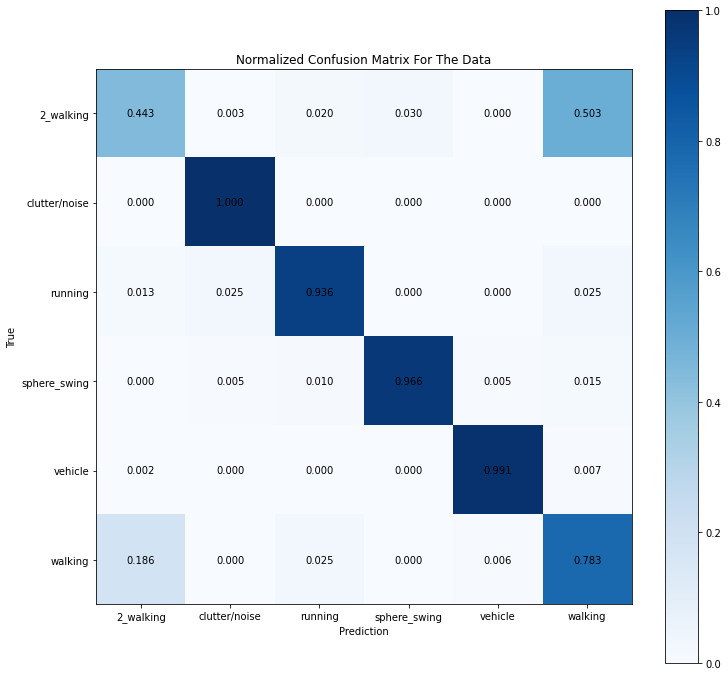

85.42014468558709

In [89]:
# Evaluate model performance on test data
#from training_functions import *
_, accuracy,errors,  y_pred_errors, y_true_errors = evaluate_model(test_loader, device, model_on_device, loss_function, train_dataset, 'The')
accuracy

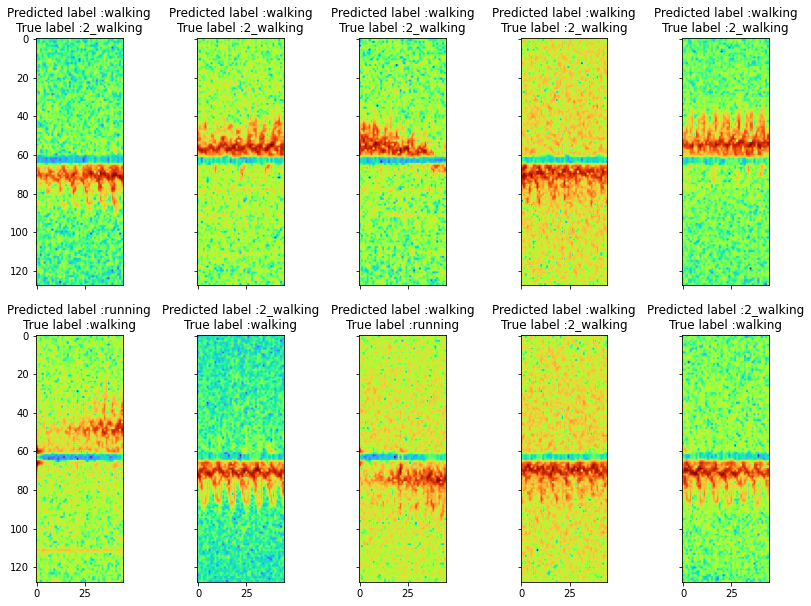

In [104]:
x_test_errors = x_test[errors]
display_errors(x_test_errors, y_pred_errors, y_true_errors, test_dataset)